In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as si
import os
import sympy as sy
from sympy.stats import Normal, cdf

In [3]:
def calculateBS(S, K, T, r, sigma, option = 'call'):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: interest rate
    #sigma: volatility of underlying asset
    
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    
    if option == 'call':
        result = (S * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0))
    if option == 'put':
        result = (K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0) - S * si.norm.cdf(-d1, 0.0, 1.0))
        
    return result

In [17]:
call_data_path = r'C:\Users\shrey\Desktop\Black-Scholes ML\Dataset\final dataset call.csv'
df=pd.read_csv(call_data_path)

C:\Users\shrey\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (11,12,13) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [19]:
calculateBS(293.2, 500, 2.06, 0.022, 0.2419, option = 'put')

189.2901631824468

In [11]:
df_copy=pd.DataFrame.copy(df)
len(df_copy)

380140

In [21]:
df_copy.head()

,[QUOTE_DATE],[UNDERLYING_LAST],[EXPIRE_DATE],[DTE],[C_DELTA],[C_GAMMA],[C_VEGA],[C_THETA],[C_RHO],[C_IV],[C_VOLUME],[C_LAST],[C_BID],[C_ASK],[STRIKE]
0,2018-01-02,172.17,2018-01-05,3.0,1.00000,0.00000,0.00000,0.00000,0.00000,,,0.0,46.99,47.15,125.0
1,2018-01-02,172.17,2018-01-05,3.0,1.00000,0.00000,0.00000,0.00000,0.00000,,3.000000,42.15,41.95,42.2,130.0
2,2018-01-02,172.17,2018-01-05,3.0,0.93296,0.00024,0.01879,-0.00974,0.00168,1.326790,,0.0,37.11,37.3,135.0
3,2018-01-02,172.17,2018-01-05,3.0,1.00000,0.00000,0.00000,0.00000,0.00000,,,0.0,31.8,32.45,140.0
4,2018-01-02,172.17,2018-01-05,3.0,1.00000,0.00000,0.00000,0.00000,0.00000,,0.000000,25.65,28.06,28.3,144.0


In [45]:
df_copy[df_copy[' [C_IV]']==' ']



,[QUOTE_DATE],[UNDERLYING_LAST],[EXPIRE_DATE],[DTE],[C_DELTA],[C_GAMMA],[C_VEGA],[C_THETA],[C_RHO],[C_IV],[C_VOLUME],[C_LAST],[C_BID],[C_ASK],[STRIKE]
0,2018-01-02,172.17,2018-01-05,3.00,1.0,0.0,0.0,0.0,0.0,,,0.0,46.99,47.15,125.0
1,2018-01-02,172.17,2018-01-05,3.00,1.0,0.0,0.0,0.0,0.0,,3.000000,42.15,41.95,42.2,130.0
3,2018-01-02,172.17,2018-01-05,3.00,1.0,0.0,0.0,0.0,0.0,,,0.0,31.8,32.45,140.0
4,2018-01-02,172.17,2018-01-05,3.00,1.0,0.0,0.0,0.0,0.0,,0.000000,25.65,28.06,28.3,144.0
5,2018-01-02,172.17,2018-01-05,3.00,1.0,0.0,0.0,0.0,0.0,,50.000000,25.11,26.9,27.35,145.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379013,2019-12-30,291.52,2021-06-18,535.96,1.0,0.0,0.0,0.0,0.0,,0.000000,215.79,214.4,218.35,75.0
379014,2019-12-30,291.52,2021-06-18,535.96,1.0,0.0,0.0,0.0,0.0,,10.000000,190.5,209.5,213.5,80.0
379015,2019-12-30,291.52,2021-06-18,535.96,1.0,0.0,0.0,0.0,0.0,,20.000000,171.65,204.5,208.51,85.0
379739,2019-12-31,293.20,2020-06-19,170.96,1.0,0.0,0.0,0.0,0.0,,0.000000,186.7,191.95,194.06,100.0


In [50]:
df_copy=df_copy.replace(r'^\s*$', np.nan, regex=True)

In [57]:
df_copy=df_copy.dropna(subset=[' [UNDERLYING_LAST]', ' [DTE]', ' [C_LAST]', ' [C_IV]', ' [STRIKE]'])

In [58]:
df_copy

,[QUOTE_DATE],[UNDERLYING_LAST],[EXPIRE_DATE],[DTE],[C_DELTA],[C_GAMMA],[C_VEGA],[C_THETA],[C_RHO],[C_IV],[C_VOLUME],[C_LAST],[C_BID],[C_ASK],[STRIKE]
2,2018-01-02,172.17,2018-01-05,3.0,0.93296,0.00024,0.01879,-0.00974,0.00168,1.326790,NaN,0.0,37.11,37.3,135.0
7,2018-01-02,172.17,2018-01-05,3.0,0.94168,0.00094,0.01792,-0.03468,0.00227,0.843940,0.000000,23.0,24.9,25.56,147.0
10,2018-01-02,172.17,2018-01-05,3.0,0.94263,0.00186,0.01850,-0.06046,0.00321,0.746180,20.000000,21.75,22.1,22.4,150.0
11,2018-01-02,172.17,2018-01-05,3.0,0.94503,0.00174,0.01738,-0.03516,0.00189,0.642770,0.000000,17.55,19.6,19.84,152.5
12,2018-01-02,172.17,2018-01-05,3.0,0.94318,0.00412,0.01893,-0.08519,0.00381,0.584440,72.000000,17.17,17.15,17.4,155.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380135,2019-12-31,293.20,2022-01-21,752.0,0.10801,0.00189,0.78462,-0.01166,0.55982,0.233260,NaN,0.0,3.0,6.0,460.0
380136,2019-12-31,293.20,2022-01-21,752.0,0.09483,0.00173,0.71350,-0.01000,0.49508,0.231790,NaN,0.0,2.17,5.51,470.0
380137,2019-12-31,293.20,2022-01-21,752.0,0.08492,0.00159,0.65873,-0.00965,0.44507,0.232120,1.000000,3.49,1.74,4.99,480.0
380138,2019-12-31,293.20,2022-01-21,752.0,0.07622,0.00146,0.60341,-0.00848,0.39812,0.232100,1.000000,2.85,1.4,4.5,490.0


In [61]:
df_copy=df_copy[df_copy[' [C_LAST]']!=0]


In [66]:
df_copy=df_copy[df_copy[' [C_LAST]']!='0.0']

In [67]:
df_copy

,[QUOTE_DATE],[UNDERLYING_LAST],[EXPIRE_DATE],[DTE],[C_DELTA],[C_GAMMA],[C_VEGA],[C_THETA],[C_RHO],[C_IV],[C_VOLUME],[C_LAST],[C_BID],[C_ASK],[STRIKE]
7,2018-01-02,172.17,2018-01-05,3.0,0.94168,0.00094,0.01792,-0.03468,0.00227,0.843940,0.000000,23.0,24.9,25.56,147.0
10,2018-01-02,172.17,2018-01-05,3.0,0.94263,0.00186,0.01850,-0.06046,0.00321,0.746180,20.000000,21.75,22.1,22.4,150.0
11,2018-01-02,172.17,2018-01-05,3.0,0.94503,0.00174,0.01738,-0.03516,0.00189,0.642770,0.000000,17.55,19.6,19.84,152.5
12,2018-01-02,172.17,2018-01-05,3.0,0.94318,0.00412,0.01893,-0.08519,0.00381,0.584440,72.000000,17.17,17.15,17.4,155.0
13,2018-01-02,172.17,2018-01-05,3.0,0.94856,0.00337,0.01729,-0.03541,0.00301,0.472370,11.000000,13.6,14.65,14.8,157.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380131,2019-12-31,293.20,2022-01-21,752.0,0.18480,0.00260,1.12195,-0.01733,0.91873,0.245510,2.000000,10.95,7.0,11.0,420.0
380133,2019-12-31,293.20,2022-01-21,752.0,0.15494,0.00231,0.99964,-0.01550,0.77516,0.247970,1.000000,6.0,5.75,8.76,440.0
380137,2019-12-31,293.20,2022-01-21,752.0,0.08492,0.00159,0.65873,-0.00965,0.44507,0.232120,1.000000,3.49,1.74,4.99,480.0
380138,2019-12-31,293.20,2022-01-21,752.0,0.07622,0.00146,0.60341,-0.00848,0.39812,0.232100,1.000000,2.85,1.4,4.5,490.0


In [77]:
df_copy=df_copy[df_copy[' [DTE]']!=0]

In [78]:
df_copy.head(10)

,[QUOTE_DATE],[UNDERLYING_LAST],[EXPIRE_DATE],[DTE],[C_DELTA],[C_GAMMA],[C_VEGA],[C_THETA],[C_RHO],[C_IV],[C_VOLUME],[C_LAST],[C_BID],[C_ASK],[STRIKE]
7,2018-01-02,172.17,2018-01-05,3.0,0.94168,0.00094,0.01792,-0.03468,0.00227,0.843940,0.000000,23.0,24.9,25.56,147.0
10,2018-01-02,172.17,2018-01-05,3.0,0.94263,0.00186,0.01850,-0.06046,0.00321,0.746180,20.000000,21.75,22.1,22.4,150.0
11,2018-01-02,172.17,2018-01-05,3.0,0.94503,0.00174,0.01738,-0.03516,0.00189,0.642770,0.000000,17.55,19.6,19.84,152.5
12,2018-01-02,172.17,2018-01-05,3.0,0.94318,0.00412,0.01893,-0.08519,0.00381,0.584440,72.000000,17.17,17.15,17.4,155.0
13,2018-01-02,172.17,2018-01-05,3.0,0.94856,0.00337,0.01729,-0.03541,0.00301,0.472370,11.000000,13.6,14.65,14.8,157.5
15,2018-01-02,172.17,2018-01-05,3.0,0.94185,0.01265,0.02001,-0.07670,0.00651,0.339540,129.000000,9.7,9.7,9.85,162.5
16,2018-01-02,172.17,2018-01-05,3.0,0.92320,0.02496,0.02531,-0.07921,0.00914,0.284250,344.000000,7.24,7.2,7.45,165.0
17,2018-01-02,172.17,2018-01-05,3.0,0.93487,0.03742,0.02271,-0.04073,0.00821,0.174990,NaN,4.85,4.71,4.8,167.5
18,2018-01-02,172.17,2018-01-05,3.0,0.77651,0.10451,0.05369,-0.10388,0.01221,0.160900,NaN,2.54,2.52,2.56,170.0
19,2018-01-02,172.17,2018-01-05,3.0,0.44894,0.15506,0.07145,-0.13058,0.00799,0.141880,NaN,0.85,0.83,0.86,172.5


In [84]:
len(df_copy)

278690

In [89]:
df_copy[df_copy[' [STRIKE]']==0]

,[QUOTE_DATE],[UNDERLYING_LAST],[EXPIRE_DATE],[DTE],[C_DELTA],[C_GAMMA],[C_VEGA],[C_THETA],[C_RHO],[C_IV],[C_VOLUME],[C_LAST],[C_BID],[C_ASK],[STRIKE]


In [90]:
df_copy.to_csv('BS call data.csv', mode='a', index=False, header=True)

In [91]:
data=pd.read_csv('BS call data.csv')
data

,[QUOTE_DATE],[UNDERLYING_LAST],[EXPIRE_DATE],[DTE],[C_DELTA],[C_GAMMA],[C_VEGA],[C_THETA],[C_RHO],[C_IV],[C_VOLUME],[C_LAST],[C_BID],[C_ASK],[STRIKE]
0,2018-01-02,172.17,2018-01-05,3.0,0.94168,0.00094,0.01792,-0.03468,0.00227,0.84394,0.0,23.00,24.90,25.56,147.0
1,2018-01-02,172.17,2018-01-05,3.0,0.94263,0.00186,0.01850,-0.06046,0.00321,0.74618,20.0,21.75,22.10,22.40,150.0
2,2018-01-02,172.17,2018-01-05,3.0,0.94503,0.00174,0.01738,-0.03516,0.00189,0.64277,0.0,17.55,19.60,19.84,152.5
3,2018-01-02,172.17,2018-01-05,3.0,0.94318,0.00412,0.01893,-0.08519,0.00381,0.58444,72.0,17.17,17.15,17.40,155.0
4,2018-01-02,172.17,2018-01-05,3.0,0.94856,0.00337,0.01729,-0.03541,0.00301,0.47237,11.0,13.60,14.65,14.80,157.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278685,2019-12-31,293.20,2022-01-21,752.0,0.18480,0.00260,1.12195,-0.01733,0.91873,0.24551,2.0,10.95,7.00,11.00,420.0
278686,2019-12-31,293.20,2022-01-21,752.0,0.15494,0.00231,0.99964,-0.01550,0.77516,0.24797,1.0,6.00,5.75,8.76,440.0
278687,2019-12-31,293.20,2022-01-21,752.0,0.08492,0.00159,0.65873,-0.00965,0.44507,0.23212,1.0,3.49,1.74,4.99,480.0
278688,2019-12-31,293.20,2022-01-21,752.0,0.07622,0.00146,0.60341,-0.00848,0.39812,0.23210,1.0,2.85,1.40,4.50,490.0


In [93]:
data=data.drop([' [QUOTE_DATE]',  ' [EXPIRE_DATE]', ' [C_VOLUME]', ' [C_BID]', ' [C_ASK]'], axis = 1)
data


,[UNDERLYING_LAST],[DTE],[C_DELTA],[C_GAMMA],[C_VEGA],[C_THETA],[C_RHO],[C_IV],[C_LAST],[STRIKE]
0,172.17,3.0,0.94168,0.00094,0.01792,-0.03468,0.00227,0.84394,23.00,147.0
1,172.17,3.0,0.94263,0.00186,0.01850,-0.06046,0.00321,0.74618,21.75,150.0
2,172.17,3.0,0.94503,0.00174,0.01738,-0.03516,0.00189,0.64277,17.55,152.5
3,172.17,3.0,0.94318,0.00412,0.01893,-0.08519,0.00381,0.58444,17.17,155.0
4,172.17,3.0,0.94856,0.00337,0.01729,-0.03541,0.00301,0.47237,13.60,157.5
...,...,...,...,...,...,...,...,...,...,...
278685,293.20,752.0,0.18480,0.00260,1.12195,-0.01733,0.91873,0.24551,10.95,420.0
278686,293.20,752.0,0.15494,0.00231,0.99964,-0.01550,0.77516,0.24797,6.00,440.0
278687,293.20,752.0,0.08492,0.00159,0.65873,-0.00965,0.44507,0.23212,3.49,480.0
278688,293.20,752.0,0.07622,0.00146,0.60341,-0.00848,0.39812,0.23210,2.85,490.0


In [102]:
dummy = pd.DataFrame({"S": [172, 172, 293],
                   "K": [147, 150, 500],
                   "T": [3, 3, 752],
                   "sigma" :[0.84, 0.74, 0.24],
                   "C":[23.0, 21.7, 3.4]})
dummy

,S,K,T,sigma,C
0,172,147,3,0.84,23.0
1,172,150,3,0.74,21.7
2,293,500,752,0.24,3.4


In [122]:
dummy['T']=dummy['T']/365


In [123]:
dummy

,S,K,T,sigma,C
0,172,147,0.008219,0.84,23.0
1,172,150,0.008219,0.74,21.7
2,293,500,2.060274,0.24,3.4


In [125]:
C_calculated= []
for index, row in dummy.iterrows():
    C_calculated.append(calculateBS(row['S'], row['K'], row['T'], 0.022, row['sigma']))
print(C_calculated)

[25.112801178971836, 22.10862334083697, 4.476526868742653]


In [127]:
data[' [DTE]']=data[' [DTE]']/365
data.head()


,[UNDERLYING_LAST],[DTE],[C_DELTA],[C_GAMMA],[C_VEGA],[C_THETA],[C_RHO],[C_IV],[C_LAST],[STRIKE]
0,172.17,0.008219,0.94168,0.00094,0.01792,-0.03468,0.00227,0.84394,23.00,147.0
1,172.17,0.008219,0.94263,0.00186,0.01850,-0.06046,0.00321,0.74618,21.75,150.0
2,172.17,0.008219,0.94503,0.00174,0.01738,-0.03516,0.00189,0.64277,17.55,152.5
3,172.17,0.008219,0.94318,0.00412,0.01893,-0.08519,0.00381,0.58444,17.17,155.0
4,172.17,0.008219,0.94856,0.00337,0.01729,-0.03541,0.00301,0.47237,13.60,157.5


In [131]:
Call_BS= []
for index, row in data.iterrows():
    Call_BS.append(calculateBS(row[' [UNDERLYING_LAST]'], row[' [STRIKE]'], row[' [DTE]'], 0.022, row[' [C_IV]']))

<ipython-input-16-8904e91537cf>:9: RuntimeWarning: divide by zero encountered in double_scalars
  d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
<ipython-input-16-8904e91537cf>:10: RuntimeWarning: divide by zero encountered in double_scalars
  d2 = (np.log(S / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))


[25.112801178971836, 22.10862334083697, 4.476526868742653]


In [135]:
print(len(Call_BS))

278690


In [136]:
len(data)

278690

In [137]:
dummy['BS_Call']= C_calculated
dummy

,S,K,T,sigma,C,BS_Call
0,172,147,0.008219,0.84,23.0,25.112801
1,172,150,0.008219,0.74,21.7,22.108623
2,293,500,2.060274,0.24,3.4,4.476527


In [138]:
data['Call_BS']= Call_BS
data

,[UNDERLYING_LAST],[DTE],[C_DELTA],[C_GAMMA],[C_VEGA],[C_THETA],[C_RHO],[C_IV],[C_LAST],[STRIKE],Call_BS
0,172.17,0.008219,0.94168,0.00094,0.01792,-0.03468,0.00227,0.84394,23.00,147.0,25.282476
1,172.17,0.008219,0.94263,0.00186,0.01850,-0.06046,0.00321,0.74618,21.75,150.0,22.279862
2,172.17,0.008219,0.94503,0.00174,0.01738,-0.03516,0.00189,0.64277,17.55,152.5,19.761204
3,172.17,0.008219,0.94318,0.00412,0.01893,-0.08519,0.00381,0.58444,17.17,155.0,17.274256
4,172.17,0.008219,0.94856,0.00337,0.01729,-0.03541,0.00301,0.47237,13.60,157.5,14.746163
...,...,...,...,...,...,...,...,...,...,...,...
278685,293.20,2.060274,0.18480,0.00260,1.12195,-0.01733,0.91873,0.24551,10.95,420.0,12.220778
278686,293.20,2.060274,0.15494,0.00231,0.99964,-0.01550,0.77516,0.24797,6.00,440.0,10.053164
278687,293.20,2.060274,0.08492,0.00159,0.65873,-0.00965,0.44507,0.23212,3.49,480.0,5.019698
278688,293.20,2.060274,0.07622,0.00146,0.60341,-0.00848,0.39812,0.23210,2.85,490.0,4.428689


In [139]:
data.to_csv('BS call data Results.csv', mode='a', index=False, header=True)

In [140]:
df=pd.read_csv('BS call data Results.csv')
df

,[UNDERLYING_LAST],[DTE],[C_DELTA],[C_GAMMA],[C_VEGA],[C_THETA],[C_RHO],[C_IV],[C_LAST],[STRIKE],Call_BS
0,172.17,0.008219,0.94168,0.00094,0.01792,-0.03468,0.00227,0.84394,23.00,147.0,25.282476
1,172.17,0.008219,0.94263,0.00186,0.01850,-0.06046,0.00321,0.74618,21.75,150.0,22.279862
2,172.17,0.008219,0.94503,0.00174,0.01738,-0.03516,0.00189,0.64277,17.55,152.5,19.761204
3,172.17,0.008219,0.94318,0.00412,0.01893,-0.08519,0.00381,0.58444,17.17,155.0,17.274256
4,172.17,0.008219,0.94856,0.00337,0.01729,-0.03541,0.00301,0.47237,13.60,157.5,14.746163
...,...,...,...,...,...,...,...,...,...,...,...
278685,293.20,2.060274,0.18480,0.00260,1.12195,-0.01733,0.91873,0.24551,10.95,420.0,12.220778
278686,293.20,2.060274,0.15494,0.00231,0.99964,-0.01550,0.77516,0.24797,6.00,440.0,10.053164
278687,293.20,2.060274,0.08492,0.00159,0.65873,-0.00965,0.44507,0.23212,3.49,480.0,5.019698
278688,293.20,2.060274,0.07622,0.00146,0.60341,-0.00848,0.39812,0.23210,2.85,490.0,4.428689


In [21]:
import sklearn
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [146]:
y_true=dummy['C']
y_pred=dummy['BS_Call']
print('MAE = ', mean_absolute_error(y_true, y_pred))
print('MSE = ', mean_squared_error(y_true, y_pred))
print('RMSE = ', mean_squared_error(y_true, y_pred, squared=False))

MAE =  1.1993171295171534
MSE =  1.9299373185554691
RMSE =  1.3892218392162818


In [150]:
df=df[df[' [C_LAST]']!=0]
df

,[UNDERLYING_LAST],[DTE],[C_DELTA],[C_GAMMA],[C_VEGA],[C_THETA],[C_RHO],[C_IV],[C_LAST],[STRIKE],Call_BS
0,172.17,0.008219,0.94168,0.00094,0.01792,-0.03468,0.00227,0.84394,23.00,147.0,25.282476
1,172.17,0.008219,0.94263,0.00186,0.01850,-0.06046,0.00321,0.74618,21.75,150.0,22.279862
2,172.17,0.008219,0.94503,0.00174,0.01738,-0.03516,0.00189,0.64277,17.55,152.5,19.761204
3,172.17,0.008219,0.94318,0.00412,0.01893,-0.08519,0.00381,0.58444,17.17,155.0,17.274256
4,172.17,0.008219,0.94856,0.00337,0.01729,-0.03541,0.00301,0.47237,13.60,157.5,14.746163
...,...,...,...,...,...,...,...,...,...,...,...
278685,293.20,2.060274,0.18480,0.00260,1.12195,-0.01733,0.91873,0.24551,10.95,420.0,12.220778
278686,293.20,2.060274,0.15494,0.00231,0.99964,-0.01550,0.77516,0.24797,6.00,440.0,10.053164
278687,293.20,2.060274,0.08492,0.00159,0.65873,-0.00965,0.44507,0.23212,3.49,480.0,5.019698
278688,293.20,2.060274,0.07622,0.00146,0.60341,-0.00848,0.39812,0.23210,2.85,490.0,4.428689


In [153]:
df.to_csv('BS call data FINAL Results.csv', mode='a', index=False, header=True)

In [3]:
df=pd.read_csv('BS call data FINAL Results.csv')
df

,[UNDERLYING_LAST],[DTE],[C_DELTA],[C_GAMMA],[C_VEGA],[C_THETA],[C_RHO],[C_IV],[C_LAST],[STRIKE],Call_BS
0,172.17,0.008219,0.94168,0.00094,0.01792,-0.03468,0.00227,0.84394,23.00,147.0,25.282476
1,172.17,0.008219,0.94263,0.00186,0.01850,-0.06046,0.00321,0.74618,21.75,150.0,22.279862
2,172.17,0.008219,0.94503,0.00174,0.01738,-0.03516,0.00189,0.64277,17.55,152.5,19.761204
3,172.17,0.008219,0.94318,0.00412,0.01893,-0.08519,0.00381,0.58444,17.17,155.0,17.274256
4,172.17,0.008219,0.94856,0.00337,0.01729,-0.03541,0.00301,0.47237,13.60,157.5,14.746163
...,...,...,...,...,...,...,...,...,...,...,...
277278,293.20,2.060274,0.18480,0.00260,1.12195,-0.01733,0.91873,0.24551,10.95,420.0,12.220778
277279,293.20,2.060274,0.15494,0.00231,0.99964,-0.01550,0.77516,0.24797,6.00,440.0,10.053164
277280,293.20,2.060274,0.08492,0.00159,0.65873,-0.00965,0.44507,0.23212,3.49,480.0,5.019698
277281,293.20,2.060274,0.07622,0.00146,0.60341,-0.00848,0.39812,0.23210,2.85,490.0,4.428689


In [29]:
df=df[df['Call_BS']!=0]


KeyError: 'Call_BS'

In [7]:
y_true=df[' [C_LAST]']
y_pred=df['Call_BS']
print('MAE = ', mean_absolute_error(y_true, y_pred))
print('MSE = ', mean_squared_error(y_true, y_pred))
print('RMSE = ', mean_squared_error(y_true, y_pred, squared=False))

MAE =  2.4235541648958523
MSE =  28.389439212749032
RMSE =  5.328174097451118


In [8]:
def MAPE(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100
print('MAPE = ', MAPE(y_true, y_pred))

MAPE =  23.953405322311937


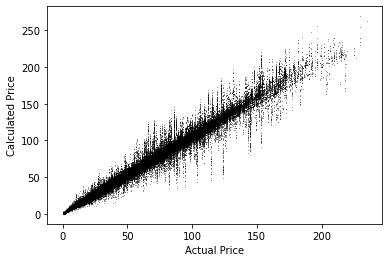

In [9]:
y_true=df[' [C_LAST]']
y_pred=df['Call_BS']

plt.scatter(y_true, y_pred,color='black',linewidth=0.2,alpha=0.5, s=0.5)
plt.xlabel('Actual Price')
plt.ylabel('Calculated Price') 
plt.show()

In [183]:
# df.to_csv('BS call FINAL Results.csv', mode='a', index=False, header=True)

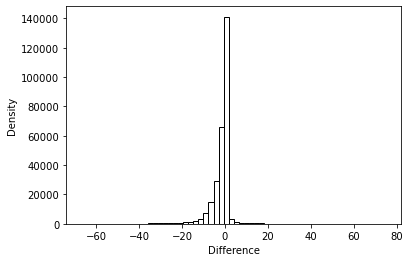

In [10]:
stats = dict()
stats['diff'] = y_true - y_pred
plt.hist(stats['diff'], bins=60,edgecolor='black',color='white')
plt.xlabel('Difference')
plt.ylabel('Density')
plt.show()

In [4]:
put_data_path = r'C:\Users\shrey\Desktop\Black-Scholes ML\Dataset\final dataset put.csv'
df=pd.read_csv(put_data_path)

C:\Users\shrey\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (5,6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
df_copy=pd.DataFrame.copy(df)
len(df_copy)

380140

In [6]:
df_copy

,[QUOTE_DATE],[UNDERLYING_LAST],[EXPIRE_DATE],[DTE],[STRIKE],[P_BID],[P_ASK],[P_LAST],[P_DELTA],[P_GAMMA],[P_VEGA],[P_THETA],[P_RHO],[P_IV],[P_VOLUME]
0,2018-01-02,172.17,2018-01-05,3.0,125.0,0.0,0.01,0.0,-0.00050,0.00016,0.00103,-0.00473,-0.00002,1.003690,
1,2018-01-02,172.17,2018-01-05,3.0,130.0,0.0,0.01,0.0,-0.00075,0.00024,0.00105,-0.00456,0.00000,0.889380,
2,2018-01-02,172.17,2018-01-05,3.0,135.0,0.0,0.01,0.02,-0.00103,0.00027,0.00070,-0.00390,0.00000,0.777900,0.000000
3,2018-01-02,172.17,2018-01-05,3.0,140.0,0.0,0.01,0.01,-0.00095,0.00038,0.00059,-0.00447,0.00000,0.670340,
4,2018-01-02,172.17,2018-01-05,3.0,144.0,0.0,0.02,0.01,-0.00151,0.00046,0.00119,-0.00462,-0.00043,0.585760,8.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380135,2019-12-31,293.20,2022-01-21,752.0,460.0,164.76,169.1,0.0,-0.98338,0.00000,0.00000,-0.00582,-9.47174,-0.000220,
380136,2019-12-31,293.20,2022-01-21,752.0,470.0,174.5,178.8,0.0,-1.00000,0.00000,47.32739,0.00000,0.00000,-0.000280,
380137,2019-12-31,293.20,2022-01-21,752.0,480.0,184.0,188.65,0.0,-1.00000,0.00000,47.30711,0.00000,0.00000,,
380138,2019-12-31,293.20,2022-01-21,752.0,490.0,194.0,198.95,0.0,-1.00000,0.00000,47.28622,0.00000,0.00000,,


In [7]:
df_copy=df_copy.replace(r'^\s*$', np.nan, regex=True)

In [8]:
df_copy

,[QUOTE_DATE],[UNDERLYING_LAST],[EXPIRE_DATE],[DTE],[STRIKE],[P_BID],[P_ASK],[P_LAST],[P_DELTA],[P_GAMMA],[P_VEGA],[P_THETA],[P_RHO],[P_IV],[P_VOLUME]
0,2018-01-02,172.17,2018-01-05,3.0,125.0,0.0,0.01,0.0,-0.00050,0.00016,0.00103,-0.00473,-0.00002,1.003690,NaN
1,2018-01-02,172.17,2018-01-05,3.0,130.0,0.0,0.01,0.0,-0.00075,0.00024,0.00105,-0.00456,0.00000,0.889380,NaN
2,2018-01-02,172.17,2018-01-05,3.0,135.0,0.0,0.01,0.02,-0.00103,0.00027,0.00070,-0.00390,0.00000,0.777900,0.000000
3,2018-01-02,172.17,2018-01-05,3.0,140.0,0.0,0.01,0.01,-0.00095,0.00038,0.00059,-0.00447,0.00000,0.670340,NaN
4,2018-01-02,172.17,2018-01-05,3.0,144.0,0.0,0.02,0.01,-0.00151,0.00046,0.00119,-0.00462,-0.00043,0.585760,8.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380135,2019-12-31,293.20,2022-01-21,752.0,460.0,164.76,169.1,0.0,-0.98338,0.00000,0.00000,-0.00582,-9.47174,-0.000220,NaN
380136,2019-12-31,293.20,2022-01-21,752.0,470.0,174.5,178.8,0.0,-1.00000,0.00000,47.32739,0.00000,0.00000,-0.000280,NaN
380137,2019-12-31,293.20,2022-01-21,752.0,480.0,184.0,188.65,0.0,-1.00000,0.00000,47.30711,0.00000,0.00000,NaN,NaN
380138,2019-12-31,293.20,2022-01-21,752.0,490.0,194.0,198.95,0.0,-1.00000,0.00000,47.28622,0.00000,0.00000,NaN,NaN


In [9]:
df_copy=df_copy.dropna(subset=[' [UNDERLYING_LAST]', ' [DTE]', ' [P_LAST]', ' [P_IV]', ' [STRIKE]'])

In [10]:
df_copy

,[QUOTE_DATE],[UNDERLYING_LAST],[EXPIRE_DATE],[DTE],[STRIKE],[P_BID],[P_ASK],[P_LAST],[P_DELTA],[P_GAMMA],[P_VEGA],[P_THETA],[P_RHO],[P_IV],[P_VOLUME]
0,2018-01-02,172.17,2018-01-05,3.0,125.0,0.0,0.01,0.0,-0.00050,0.00016,0.00103,-0.00473,-0.00002,1.003690,NaN
1,2018-01-02,172.17,2018-01-05,3.0,130.0,0.0,0.01,0.0,-0.00075,0.00024,0.00105,-0.00456,0.00000,0.889380,NaN
2,2018-01-02,172.17,2018-01-05,3.0,135.0,0.0,0.01,0.02,-0.00103,0.00027,0.00070,-0.00390,0.00000,0.777900,0.000000
3,2018-01-02,172.17,2018-01-05,3.0,140.0,0.0,0.01,0.01,-0.00095,0.00038,0.00059,-0.00447,0.00000,0.670340,NaN
4,2018-01-02,172.17,2018-01-05,3.0,144.0,0.0,0.02,0.01,-0.00151,0.00046,0.00119,-0.00462,-0.00043,0.585760,8.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380132,2019-12-31,293.20,2022-01-21,752.0,430.0,137.0,140.86,143.05,-1.00000,0.00000,47.41053,0.00000,0.00000,0.000180,0.000000
380133,2019-12-31,293.20,2022-01-21,752.0,440.0,146.15,150.5,0.0,-0.98330,0.00000,0.00000,-0.00649,-9.06020,0.000320,NaN
380134,2019-12-31,293.20,2022-01-21,752.0,450.0,154.99,159.49,0.0,-1.00000,0.00000,47.36895,0.00000,0.00000,0.000470,NaN
380135,2019-12-31,293.20,2022-01-21,752.0,460.0,164.76,169.1,0.0,-0.98338,0.00000,0.00000,-0.00582,-9.47174,-0.000220,NaN


In [11]:
df_copy=df_copy[df_copy[' [P_LAST]']!=0]
df_copy

,[QUOTE_DATE],[UNDERLYING_LAST],[EXPIRE_DATE],[DTE],[STRIKE],[P_BID],[P_ASK],[P_LAST],[P_DELTA],[P_GAMMA],[P_VEGA],[P_THETA],[P_RHO],[P_IV],[P_VOLUME]
2,2018-01-02,172.17,2018-01-05,3.0,135.0,0.0,0.01,0.02,-0.00103,0.00027,0.00070,-0.00390,0.00000,0.777900,0.000000
3,2018-01-02,172.17,2018-01-05,3.0,140.0,0.0,0.01,0.01,-0.00095,0.00038,0.00059,-0.00447,0.00000,0.670340,NaN
4,2018-01-02,172.17,2018-01-05,3.0,144.0,0.0,0.02,0.01,-0.00151,0.00046,0.00119,-0.00462,-0.00043,0.585760,8.000000
5,2018-01-02,172.17,2018-01-05,3.0,145.0,0.0,0.01,0.01,-0.00214,0.00056,0.00065,-0.00460,0.00000,0.565150,358.000000
6,2018-01-02,172.17,2018-01-05,3.0,146.0,0.0,0.01,0.01,-0.00191,0.00055,0.00094,-0.00450,0.00000,0.544600,836.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380125,2019-12-31,293.20,2022-01-21,752.0,360.0,79.21,83.35,82.05,-0.74304,0.00396,1.30360,-0.02135,-6.15503,0.186500,20.000000
380126,2019-12-31,293.20,2022-01-21,752.0,370.0,86.65,90.69,111.23,-0.78759,0.00361,1.15885,-0.01832,-6.57983,0.177490,1.000000
380127,2019-12-31,293.20,2022-01-21,752.0,380.0,94.34,98.49,97.0,-0.83230,0.00330,0.98488,-0.01639,-7.00828,0.168080,2.000000
380131,2019-12-31,293.20,2022-01-21,752.0,420.0,128.0,131.81,137.5,-0.98340,0.00000,0.00000,-0.00674,-8.64837,-0.000220,1.000000


In [12]:
df_copy=df_copy[df_copy[' [DTE]']!=0]
df_copy

,[QUOTE_DATE],[UNDERLYING_LAST],[EXPIRE_DATE],[DTE],[STRIKE],[P_BID],[P_ASK],[P_LAST],[P_DELTA],[P_GAMMA],[P_VEGA],[P_THETA],[P_RHO],[P_IV],[P_VOLUME]
2,2018-01-02,172.17,2018-01-05,3.0,135.0,0.0,0.01,0.02,-0.00103,0.00027,0.00070,-0.00390,0.00000,0.777900,0.000000
3,2018-01-02,172.17,2018-01-05,3.0,140.0,0.0,0.01,0.01,-0.00095,0.00038,0.00059,-0.00447,0.00000,0.670340,NaN
4,2018-01-02,172.17,2018-01-05,3.0,144.0,0.0,0.02,0.01,-0.00151,0.00046,0.00119,-0.00462,-0.00043,0.585760,8.000000
5,2018-01-02,172.17,2018-01-05,3.0,145.0,0.0,0.01,0.01,-0.00214,0.00056,0.00065,-0.00460,0.00000,0.565150,358.000000
6,2018-01-02,172.17,2018-01-05,3.0,146.0,0.0,0.01,0.01,-0.00191,0.00055,0.00094,-0.00450,0.00000,0.544600,836.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380125,2019-12-31,293.20,2022-01-21,752.0,360.0,79.21,83.35,82.05,-0.74304,0.00396,1.30360,-0.02135,-6.15503,0.186500,20.000000
380126,2019-12-31,293.20,2022-01-21,752.0,370.0,86.65,90.69,111.23,-0.78759,0.00361,1.15885,-0.01832,-6.57983,0.177490,1.000000
380127,2019-12-31,293.20,2022-01-21,752.0,380.0,94.34,98.49,97.0,-0.83230,0.00330,0.98488,-0.01639,-7.00828,0.168080,2.000000
380131,2019-12-31,293.20,2022-01-21,752.0,420.0,128.0,131.81,137.5,-0.98340,0.00000,0.00000,-0.00674,-8.64837,-0.000220,1.000000


In [13]:
df_copy=df_copy.drop([' [QUOTE_DATE]',  ' [EXPIRE_DATE]', ' [P_VOLUME]', ' [P_BID]', ' [P_ASK]'], axis = 1)

In [14]:
df_copy

,[UNDERLYING_LAST],[DTE],[STRIKE],[P_LAST],[P_DELTA],[P_GAMMA],[P_VEGA],[P_THETA],[P_RHO],[P_IV]
2,172.17,3.0,135.0,0.02,-0.00103,0.00027,0.00070,-0.00390,0.00000,0.777900
3,172.17,3.0,140.0,0.01,-0.00095,0.00038,0.00059,-0.00447,0.00000,0.670340
4,172.17,3.0,144.0,0.01,-0.00151,0.00046,0.00119,-0.00462,-0.00043,0.585760
5,172.17,3.0,145.0,0.01,-0.00214,0.00056,0.00065,-0.00460,0.00000,0.565150
6,172.17,3.0,146.0,0.01,-0.00191,0.00055,0.00094,-0.00450,0.00000,0.544600
...,...,...,...,...,...,...,...,...,...,...
380125,293.20,752.0,360.0,82.05,-0.74304,0.00396,1.30360,-0.02135,-6.15503,0.186500
380126,293.20,752.0,370.0,111.23,-0.78759,0.00361,1.15885,-0.01832,-6.57983,0.177490
380127,293.20,752.0,380.0,97.0,-0.83230,0.00330,0.98488,-0.01639,-7.00828,0.168080
380131,293.20,752.0,420.0,137.5,-0.98340,0.00000,0.00000,-0.00674,-8.64837,-0.000220


In [19]:
df_copy.to_csv('BS put data.csv', mode='a', index=False, header=True)

In [20]:
df_copy[' [DTE]']=df_copy[' [DTE]']/365
df_copy.head()

,[UNDERLYING_LAST],[DTE],[STRIKE],[P_LAST],[P_DELTA],[P_GAMMA],[P_VEGA],[P_THETA],[P_RHO],[P_IV]
2,172.17,0.008219,135.0,0.02,-0.00103,0.00027,0.00070,-0.00390,0.00000,0.777900
3,172.17,0.008219,140.0,0.01,-0.00095,0.00038,0.00059,-0.00447,0.00000,0.670340
4,172.17,0.008219,144.0,0.01,-0.00151,0.00046,0.00119,-0.00462,-0.00043,0.585760
5,172.17,0.008219,145.0,0.01,-0.00214,0.00056,0.00065,-0.00460,0.00000,0.565150
6,172.17,0.008219,146.0,0.01,-0.00191,0.00055,0.00094,-0.00450,0.00000,0.544600


In [33]:
df_copy[' [P_IV]']=df_copy[' [P_IV]'].astype(float)

In [36]:
dataset=pd.read_csv('BS call data FINAL Results.csv')
dataset

,[UNDERLYING_LAST],[DTE],[C_DELTA],[C_GAMMA],[C_VEGA],[C_THETA],[C_RHO],[C_IV],[C_LAST],[STRIKE],Call_BS
0,172.17,0.008219,0.94168,0.00094,0.01792,-0.03468,0.00227,0.84394,23.00,147.0,25.282476
1,172.17,0.008219,0.94263,0.00186,0.01850,-0.06046,0.00321,0.74618,21.75,150.0,22.279862
2,172.17,0.008219,0.94503,0.00174,0.01738,-0.03516,0.00189,0.64277,17.55,152.5,19.761204
3,172.17,0.008219,0.94318,0.00412,0.01893,-0.08519,0.00381,0.58444,17.17,155.0,17.274256
4,172.17,0.008219,0.94856,0.00337,0.01729,-0.03541,0.00301,0.47237,13.60,157.5,14.746163
...,...,...,...,...,...,...,...,...,...,...,...
277278,293.20,2.060274,0.18480,0.00260,1.12195,-0.01733,0.91873,0.24551,10.95,420.0,12.220778
277279,293.20,2.060274,0.15494,0.00231,0.99964,-0.01550,0.77516,0.24797,6.00,440.0,10.053164
277280,293.20,2.060274,0.08492,0.00159,0.65873,-0.00965,0.44507,0.23212,3.49,480.0,5.019698
277281,293.20,2.060274,0.07622,0.00146,0.60341,-0.00848,0.39812,0.23210,2.85,490.0,4.428689


In [45]:
dataset=dataset[dataset[' [C_IV]']>0]

In [47]:
dataset.to_csv('BS call data ULTRA FINAL Results.csv', mode='a', index=False, header=True)

In [48]:
Put_BS= []
for index, row in df_copy.iterrows():
    Put_BS.append(calculateBS(row[' [UNDERLYING_LAST]'], row[' [STRIKE]'], row[' [DTE]'], 0.022, row[' [P_IV]'], 'put'))

<ipython-input-3-8904e91537cf>:9: RuntimeWarning: divide by zero encountered in double_scalars
  d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
<ipython-input-3-8904e91537cf>:10: RuntimeWarning: divide by zero encountered in double_scalars
  d2 = (np.log(S / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))


In [50]:
df_copy['Put_BS']=Put_BS
df_copy

,[UNDERLYING_LAST],[DTE],[STRIKE],[P_LAST],[P_DELTA],[P_GAMMA],[P_VEGA],[P_THETA],[P_RHO],[P_IV],Put_BS
2,172.17,0.008219,135.0,0.02,-0.00103,0.00027,0.00070,-0.00390,0.00000,0.77790,0.000762
3,172.17,0.008219,140.0,0.01,-0.00095,0.00038,0.00059,-0.00447,0.00000,0.67034,0.000797
4,172.17,0.008219,144.0,0.01,-0.00151,0.00046,0.00119,-0.00462,-0.00043,0.58576,0.000820
5,172.17,0.008219,145.0,0.01,-0.00214,0.00056,0.00065,-0.00460,0.00000,0.56515,0.000833
6,172.17,0.008219,146.0,0.01,-0.00191,0.00055,0.00094,-0.00450,0.00000,0.54460,0.000845
...,...,...,...,...,...,...,...,...,...,...,...
380125,293.20,2.060274,360.0,82.05,-0.74304,0.00396,1.30360,-0.02135,-6.15503,0.18650,65.179230
380126,293.20,2.060274,370.0,111.23,-0.78759,0.00361,1.15885,-0.01832,-6.57983,0.17749,71.388575
380127,293.20,2.060274,380.0,97.0,-0.83230,0.00330,0.98488,-0.01639,-7.00828,0.16808,78.021552
380131,293.20,2.060274,420.0,137.5,-0.98340,0.00000,0.00000,-0.00674,-8.64837,-0.00022,0.000000


In [58]:
df_copy=df_copy[df_copy[' [P_IV]']>0]
df_copy

,[UNDERLYING_LAST],[DTE],[STRIKE],[P_LAST],[P_DELTA],[P_GAMMA],[P_VEGA],[P_THETA],[P_RHO],[P_IV],Put_BS
2,172.17,0.008219,135.0,0.02,-0.00103,0.00027,0.00070,-0.00390,0.00000,0.77790,0.000762
3,172.17,0.008219,140.0,0.01,-0.00095,0.00038,0.00059,-0.00447,0.00000,0.67034,0.000797
4,172.17,0.008219,144.0,0.01,-0.00151,0.00046,0.00119,-0.00462,-0.00043,0.58576,0.000820
5,172.17,0.008219,145.0,0.01,-0.00214,0.00056,0.00065,-0.00460,0.00000,0.56515,0.000833
6,172.17,0.008219,146.0,0.01,-0.00191,0.00055,0.00094,-0.00450,0.00000,0.54460,0.000845
...,...,...,...,...,...,...,...,...,...,...,...
380124,293.20,2.060274,350.0,80.38,-0.69845,0.00415,1.41879,-0.02242,-5.75046,0.19411,59.202701
380125,293.20,2.060274,360.0,82.05,-0.74304,0.00396,1.30360,-0.02135,-6.15503,0.18650,65.179230
380126,293.20,2.060274,370.0,111.23,-0.78759,0.00361,1.15885,-0.01832,-6.57983,0.17749,71.388575
380127,293.20,2.060274,380.0,97.0,-0.83230,0.00330,0.98488,-0.01639,-7.00828,0.16808,78.021552


In [67]:
df_copy[' [P_LAST]']=df_copy[' [P_LAST]'].astype(float)
df_copy

<ipython-input-67-922bb4e589c8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy[' [P_LAST]']=df_copy[' [P_LAST]'].astype(float)


,[UNDERLYING_LAST],[DTE],[STRIKE],[P_LAST],[P_DELTA],[P_GAMMA],[P_VEGA],[P_THETA],[P_RHO],[P_IV],Put_BS
2,172.17,0.008219,135.0,0.02,-0.00103,0.00027,0.00070,-0.00390,0.00000,0.77790,0.000762
3,172.17,0.008219,140.0,0.01,-0.00095,0.00038,0.00059,-0.00447,0.00000,0.67034,0.000797
4,172.17,0.008219,144.0,0.01,-0.00151,0.00046,0.00119,-0.00462,-0.00043,0.58576,0.000820
5,172.17,0.008219,145.0,0.01,-0.00214,0.00056,0.00065,-0.00460,0.00000,0.56515,0.000833
6,172.17,0.008219,146.0,0.01,-0.00191,0.00055,0.00094,-0.00450,0.00000,0.54460,0.000845
...,...,...,...,...,...,...,...,...,...,...,...
380124,293.20,2.060274,350.0,80.38,-0.69845,0.00415,1.41879,-0.02242,-5.75046,0.19411,59.202701
380125,293.20,2.060274,360.0,82.05,-0.74304,0.00396,1.30360,-0.02135,-6.15503,0.18650,65.179230
380126,293.20,2.060274,370.0,111.23,-0.78759,0.00361,1.15885,-0.01832,-6.57983,0.17749,71.388575
380127,293.20,2.060274,380.0,97.00,-0.83230,0.00330,0.98488,-0.01639,-7.00828,0.16808,78.021552


In [70]:
df_copy=df_copy[df_copy[' [P_LAST]']!=0]

In [71]:
df_copy.to_csv('BS put data ULTRA FINAL Results.csv', mode='a', index=False, header=True)

In [73]:
y_true=df_copy[' [P_LAST]']
y_pred=df_copy['Put_BS']
print('MAE = ', mean_absolute_error(y_true, y_pred))
print('MSE = ', mean_squared_error(y_true, y_pred))
print('RMSE = ', mean_squared_error(y_true, y_pred, squared=False))

MAE =  1.9674546246831879
MSE =  30.53596475681102
RMSE =  5.525935645373643


In [74]:
y_true=df_copy[' [P_LAST]']
y_pred=df_copy['Put_BS']
def MAPE(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100
print('MAPE = ', MAPE(y_true, y_pred))

MAPE =  26.015458291006954


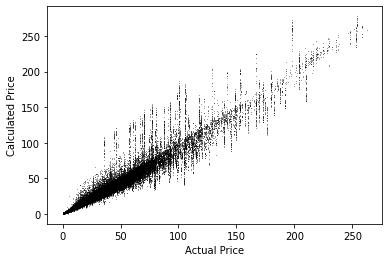

In [75]:
plt.scatter(y_true, y_pred,color='black',linewidth=0.2,alpha=0.5, s=0.5)
plt.xlabel('Actual Price')
plt.ylabel('Calculated Price') 
plt.show()

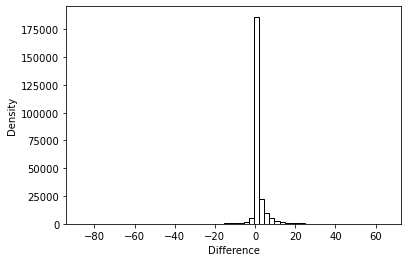

In [79]:
stats = dict()
stats['diff'] = y_true - y_pred
plt.hist(stats['diff'], bins=60,edgecolor='black',color='white')
plt.xlabel('Difference')
plt.ylabel('Density')
plt.show()

In [82]:
dataset

,[UNDERLYING_LAST],[DTE],[C_DELTA],[C_GAMMA],[C_VEGA],[C_THETA],[C_RHO],[C_IV],[C_LAST],[STRIKE],Call_BS
0,172.17,0.008219,0.94168,0.00094,0.01792,-0.03468,0.00227,0.84394,23.00,147.0,25.282476
1,172.17,0.008219,0.94263,0.00186,0.01850,-0.06046,0.00321,0.74618,21.75,150.0,22.279862
2,172.17,0.008219,0.94503,0.00174,0.01738,-0.03516,0.00189,0.64277,17.55,152.5,19.761204
3,172.17,0.008219,0.94318,0.00412,0.01893,-0.08519,0.00381,0.58444,17.17,155.0,17.274256
4,172.17,0.008219,0.94856,0.00337,0.01729,-0.03541,0.00301,0.47237,13.60,157.5,14.746163
...,...,...,...,...,...,...,...,...,...,...,...
277278,293.20,2.060274,0.18480,0.00260,1.12195,-0.01733,0.91873,0.24551,10.95,420.0,12.220778
277279,293.20,2.060274,0.15494,0.00231,0.99964,-0.01550,0.77516,0.24797,6.00,440.0,10.053164
277280,293.20,2.060274,0.08492,0.00159,0.65873,-0.00965,0.44507,0.23212,3.49,480.0,5.019698
277281,293.20,2.060274,0.07622,0.00146,0.60341,-0.00848,0.39812,0.23210,2.85,490.0,4.428689


In [83]:
y_true=dataset[' [C_LAST]']
y_pred=dataset['Call_BS']
print('MAE = ', mean_absolute_error(y_true, y_pred))
print('MSE = ', mean_squared_error(y_true, y_pred))
print('RMSE = ', mean_squared_error(y_true, y_pred, squared=False))

MAE =  2.423450296562179
MSE =  28.38789737606486
RMSE =  5.328029408333334


In [84]:
def MAPE(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100
print('MAPE = ', MAPE(y_true, y_pred))

MAPE =  23.95377822933623


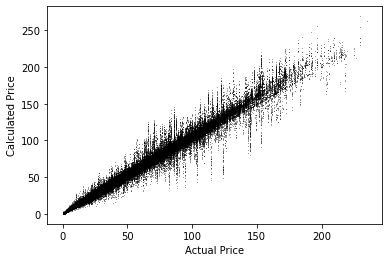

In [85]:
plt.scatter(y_true, y_pred,color='black',linewidth=0.2,alpha=0.5, s=0.5)
plt.xlabel('Actual Price')
plt.ylabel('Calculated Price') 
plt.show()

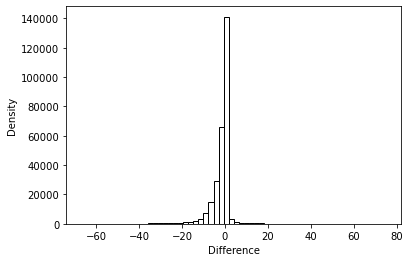

In [86]:
stats = dict()
stats['diff'] = y_true - y_pred
plt.hist(stats['diff'], bins=60,edgecolor='black',color='white')
plt.xlabel('Difference')
plt.ylabel('Density')
plt.show()